# SDG&E Electric Grid Polyon to Lines

SDG&E electric grid data is in polygon format when downloaded. This is different from the electric grid data acquired from SCE and PG&E which is in line format. This notebook creates line data from the polygon data. 

In [1]:
# load necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box  # To create polygon bounding box
import glob
import os
import folium # for the interactive map
import pygeoops # to get the centerline of the polygons

# Connecting the Polygons

To riterate this analysis is relying on feeder line data. SDG&E holds feeder line data on polygons. We'll use `GeoPandas` `dissolve()` function to aggregate the polygons based on the `SUBID`. Geospatially, the load and generation capacity maps are the same. The generation capacity is most in line with the data from other utilities so it will be utilized for this analysis. 

In [2]:
# load SDGE generation capacity data
sdge_generation_capacity = gpd.read_file("../../../../capstone/electrigrid/data/utilities/sandiego_grid/ICA_MAP_PROD_GenerationCapacityGrids.geojson")

In [3]:
# use subid to join the lines
sub_gen_capacity = sdge_generation_capacity.dissolve(by = 'SUBID')

# check the geometry types of the outcome
sub_gen_capacity.geom_type

SUBID
ALPINE                 Polygon
ARTESIAN RANCH         Polygon
ASH                    Polygon
AVOCADO           MultiPolygon
BARRETT                Polygon
                      ...     
URBAN                  Polygon
VALLEY CENTER          Polygon
VINE              MultiPolygon
WABASH CANYON          Polygon
WARNERS           MultiPolygon
Length: 104, dtype: object

In [4]:
# the subid is now an index but we need it as a column to read it into the interactive map 
sub_gen_capacity['substations'] = sub_gen_capacity.index

# Utilize `pygeoops.centerline` to get centerlines

Calculate the centerlines with pygeoops.


In [6]:
sub_gen_capacity.geometry = pygeoops.centerline(sub_gen_capacity.geometry)

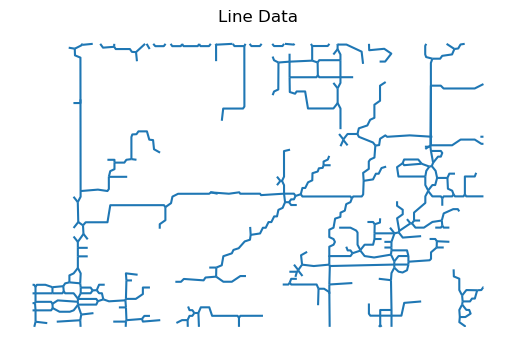

In [ ]:
# make a bbox to get a closer look
sd_bbox = box(-117.136541,32.713699,-117.071653,32.747959)

# use the San Diego bbox to make better analyze the findings
sd_sub_gen_capacity = gpd.clip(sub_gen_capacity, sd_bbox)

# plot the subset of load gen differences
fig, ax = plt.subplots()

sd_sub_gen_capacity.plot(ax=ax)

ax.set_title('SDG&E Line Data')
ax.axis('off')

plt.show()

Save the centerlines for the analysis. The next code chunk saves it directly to the directory where the file is being run. It is downloaded and added to the capstone data folder on workbench 2. It is commented out to avoid git issues from accidentally attempting to push large amounts of data.

In [ ]:
# output_shapefile_path•=. 'lines_sdge.geojson'
# sub_gen_capacity.to_file(output_shapefile_path)

/tmp/ipykernel_374296/2457284898.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sd_sub_gen_capacity.to_file(output_shapefile_path)


In [ ]:
# read in the new file to make sure it worked
# line_sdge = gpd. read_file("Lines_sdge. geojson")

# view the new data frame
# line_sdge.head ()

In [ ]:
# plot the line data to ensure its all there
# fig, ax = plt.subplots()
# line_sdge. plot (ax=ax)
# ax. set_title('SDG&E Line Data')
# ax.axis('off')
# plt. show()